Data pre-processing
Removing noise (If required).
Changing the size of the images (If required).
Normalizing the pixels values. 
Encoding the target variable.

Exploratory Data Analysis
Converting images pixels to other formats (RGB and HSV if required)
Use appropriate Edge Detectors (If required)
Insights from EDA

Analytical Approach
Mention the alternative analytical approaches that you may see fit to be applied to the problem

In [47]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install tensorflow=2.15

ERROR: Invalid requirement: 'tensorflow=2.15'
Hint: = is not a valid operator. Did you mean == ?
Note: you may need to restart the kernel to use updated packages.


In [119]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, callbacks

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

from sklearn.metrics import plot_confusion_matrix


In [49]:
labels_dict = {
    'Happy': 0,
    'Not_Happy': 1
}

Load and Normalize data

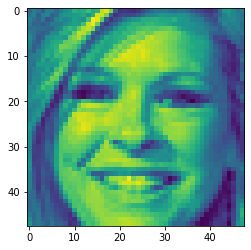

In [51]:
# Normalizing image resize 
directory = "/Users/geeta-mit/Desktop/capstone-project/milestone-1/content/Dataset/Training/Train/"
test_directory = "/Users/geeta-mit/Desktop/capstone-project/milestone-1/content/Dataset/Training/Test/"
classes=["Happy","Not_Happy"]
X,y ,resize_X,np_resize_X= [], [],[],[]
canny_img_X=[]
cat=[]




for category in classes:
  path= os.path.join(directory,category)
  for img_name in os.listdir(path):
    cat.append(labels_dict.get(category))
    y.append(labels_dict[category])
    img=cv2.imread(os.path.join(path,img_name))
    X.append(img)    
    resize_img=cv2.resize(img, (48, 48))
    gray_image = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
    resize_img = gray_image/255.0
    np_resize_X.append(resize_img)

plt.imshow(np_resize_X[10])


In [52]:
test_X,test_y ,test_resize_X,test_np_resize_X= [], [],[],[]
test_canny_img_X=[]

test_cat=[]
for category in classes:
  path= os.path.join(test_directory,category)
  for img_name in os.listdir(path):
    img=cv2.imread(os.path.join(path,img_name))
    if img is not None:
      test_cat.append(labels_dict.get(category))
      test_y.append(labels_dict[category])
      test_X.append(img)
      test_resize_img=cv2.resize(img, (48, 48))
      gray_image = cv2.cvtColor(test_resize_img, cv2.COLOR_BGR2GRAY)
      test_resize_img = gray_image/255.0
      test_np_resize_X.append(test_resize_img)

In [53]:
import pandas as pd
dataFrame = pd.DataFrame()
dataFrame['img'] = X
dataFrame['cat'] = cat
dataFrame['class'] = y
dataFrame['np_normalize_img'] = np_resize_X
dataFrame = dataFrame.sample(frac=1).reset_index(drop=True)

test_dataFrame = pd.DataFrame()
test_dataFrame['img'] = test_X
test_dataFrame['cat'] = test_cat
test_dataFrame['class'] = test_y
test_dataFrame['np_normalize_img'] = test_np_resize_X
test_dataFrame = test_dataFrame.sample(frac=1).reset_index(drop=True)

dataFrame.head()

,img,cat,class,np_normalize_img
0,"[[[150, 150, 150], [154, 154, 154], [157, 157,...",0,0,"[[0.5882352941176471, 0.6039215686274509, 0.61..."
1,"[[[0, 0, 0], [2, 2, 2], [14, 14, 14], [67, 67,...",1,1,"[[0.0, 0.00784313725490196, 0.0549019607843137..."
2,"[[[165, 165, 165], [151, 151, 151], [155, 155,...",0,0,"[[0.6470588235294118, 0.592156862745098, 0.607..."
3,"[[[248, 248, 248], [252, 252, 252], [246, 246,...",1,1,"[[0.9725490196078431, 0.9882352941176471, 0.96..."
4,"[[[235, 235, 235], [235, 235, 235], [239, 239,...",0,0,"[[0.9215686274509803, 0.9215686274509803, 0.93..."


In [55]:
# Select ratio
ratio = 0.80
 
total_rows = dataFrame.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train_ds = dataFrame[0:train_size]
validation_ds = dataFrame[train_size:]
print("train DF :"+ str(train_ds.shape[0]))
print("Validation DF :"+ str(validation_ds.shape[0]))

train DF :3217
Validation DF :805


Argumentation Techniques can be applied to Training data to improve model performance
Flip and Rotation  help model to perform well in real life images orientation which can be upside down.
Bluring can reduce noise and focus on key feature

In [115]:
from keras.optimizers import Adam

def create_model(layer):
    filters =32
    kernel_size=(3,3)
    cnn = models.Sequential([
        tf.keras.layers.Conv2D(filters, kernel_size, activation='relu', input_shape=(48,48,1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(filters * 2, kernel_size,activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(filters * 4, kernel_size,activation='relu'),
        tf.keras.layers.Flatten()
    ])

    for nodes in layer:
        cnn.add(tf.keras.layers.Dense(units=nodes, activation='relu'))

    
        
    cnn.add( tf.keras.layers.Dense(112, activation='relu'))
    cnn.add(tf.keras.layers.Dense(2),activation='softmax')
    optimizer = Adam(learning_rate=0.02)
    
    cnn.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return cnn

base_model.summary()

In [58]:
pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install scikit-keras

Note: you may need to restart the kernel to use updated packages.


In [66]:
from skkeras import KerasClassifier

In [67]:

from sklearn.model_selection import GridSearchCV

In [19]:
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import GridSearchCV

In [118]:
def create_model(layers):
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    cnn.add(tf.keras.layers.Flatten())
    
    for i, nodes in enumerate(layers):
        cnn.add(tf.keras.layers.Dense(units=nodes, activation='relu'))
            
    cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))
    
    cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cnn

data_X = np.array(train_ds['np_normalize_img'].tolist())
data_y = np.array(train_ds['class'].tolist())
validate_X = np.array(validation_ds['np_normalize_img'].tolist())
validate_y = np.array(validation_ds['class'].tolist())
X_data = data_X.astype('float32')
model = KerasClassifier(build_fn=create_model, verbose=1)
layers = [[128],(256, 128),(200, 150, 120)]
param_grid = dict(layers=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1)
grid_results = grid.fit(data_X,data_y, validation_data=(validate_X, validate_y))
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/skkeras/scikit_learn.py", line 295, in fit
    return super(KerasClassifier, self).fit(X, y, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/skkeras/scikit_learn.py", line 175, in fit
    self.model_ = self.build_fn(
TypeError: create_model() got

TypeError: create_model() got multiple values for argument 'layers'

In [116]:

base_model = KerasClassifier(build_fn=create_model,  verbose=1)



layers = [128]

param_grid = dict(layer=np.array([128]))

data_X = np.array(train_ds['np_normalize_img'].tolist())
data_y = np.array(train_ds['class'].tolist())
validate_X = np.array(validation_ds['np_normalize_img'].tolist())
validate_y = np.array(validation_ds['class'].tolist())
num_classes = 2


# Perform grid search
grid = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='accuracy',verbose=1)
grid_results = grid.fit(data_X, data_y,validation_data=(validate_X, validate_y))
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/skkeras/scikit_learn.py", line 295, in fit
    return super(KerasClassifier, self).fit(X, y, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/skkeras/scikit_learn.py", line 175, in fit
    self.model_ = self.build_fn(
TypeError: create_model() got mu

TypeError: create_model() got multiple values for argument 'layer'

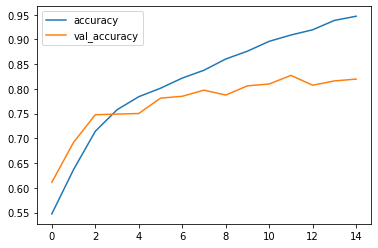

In [64]:
# Plot training & validation loss values
plt.plot(history_normal.history['accuracy'], label='accuracy')
plt.plot(history_normal.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [25]:
test_X = np.array(test_dataFrame['np_normalize_img'].tolist())
test_y = np.array(test_dataFrame['class'].tolist())
base_model.evaluate(test_X,test_y)

14/14 [==============================] - 0s 11ms/step - loss: 0.5540 - accuracy: 0.7934


[0.5540189146995544, 0.7934272289276123]

For base model on validation data 
loss is 1.1 which neans  on average, the model's predictions are about 1.162 units away from the true values
and accuracy is 0.80, 80.75% of the predictions made by the model during evaluation were correct.

Goal is to reduce lass and increase accuracy


In [69]:
from tensorflow.keras.regularizers import l2

model_2 = models.Sequential([
             layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(48,48,1)),
             layers.experimental.preprocessing.RandomContrast(0.2),
             layers.experimental.preprocessing.RandomRotation(0.2),
             layers.Conv2D(32,(3,3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001),input_shape=(48,48,1)),
             layers.Dropout(0.2),
             layers.MaxPooling2D((2,2)),
             layers.Conv2D(64, (3,3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001),activation='relu'),
             layers.Dropout(0.3),
             layers.BatchNormalization(),
             layers.MaxPooling2D((2,2)),
             layers.Conv2D(128, (3,3), padding='same',strides=(1, 1), kernel_regularizer=l2(0.001), activation='relu'),
             layers.MaxPooling2D((2,2)),
             layers.Conv2D(512, (3,3), padding='same',strides=(1, 1), kernel_regularizer=l2(0.001), activation='relu'),
             layers.Flatten(),
             layers.Dense(128, activation='relu'),
             layers.Dense(2, activation='softmax')
])

In [70]:
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_16 (RandomFlip  (None, 48, 48, 1)         0         
 )                                                               
                                                                 
 random_contrast_12 (Random  (None, 48, 48, 1)         0         
 Contrast)                                                       
                                                                 
 random_rotation_17 (Random  (None, 48, 48, 1)         0         
 Rotation)                                                       
                                                                 
 conv2d_63 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 32)        0         
                                                     

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model
history_2 = model_2.fit(data_X, data_y,validation_data=(validate_X, validate_y),epochs=50)


Epoch 1/50
101/101 [==============================] - 20s 186ms/step - loss: 0.3685 - accuracy: 0.8719 - val_loss: 0.5498 - val_accuracy: 0.8050
Epoch 2/50
101/101 [==============================] - 19s 183ms/step - loss: 0.3519 - accuracy: 0.8757 - val_loss: 0.5282 - val_accuracy: 0.8124
Epoch 3/50
101/101 [==============================] - 19s 189ms/step - loss: 0.3607 - accuracy: 0.8766 - val_loss: 0.4809 - val_accuracy: 0.8472
Epoch 4/50
101/101 [==============================] - 19s 184ms/step - loss: 0.3596 - accuracy: 0.8732 - val_loss: 0.4564 - val_accuracy: 0.8410
Epoch 5/50
101/101 [==============================] - 20s 195ms/step - loss: 0.3511 - accuracy: 0.8747 - val_loss: 0.4124 - val_accuracy: 0.8547
Epoch 6/50
101/101 [==============================] - 18s 181ms/step - loss: 0.3735 - accuracy: 0.8694 - val_loss: 0.4368 - val_accuracy: 0.8509
Epoch 7/50
101/101 [==============================] - 18s 181ms/step - loss: 0.3722 - accuracy: 0.8704 - val_loss: 0.4474 - val_ac

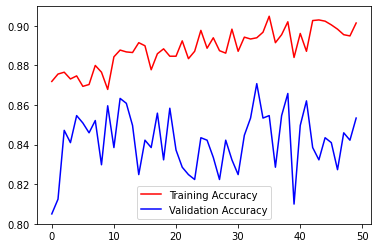

In [85]:
# Plot training & validation loss values

plt.plot(history_2.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history_2.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [87]:
data_X = np.array(train_ds['np_normalize_img'].tolist())
data_y = np.array(train_ds['class'].tolist())
validate_X = np.array(validation_ds['np_normalize_img'].tolist())
validate_y = np.array(validation_ds['class'].tolist())


num_classes = 2

model_3 = models.Sequential([
             layers.Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(48,48,1)),
             layers.MaxPooling2D((2,2)),
             layers.Conv2D(64, (3,3), padding='same', activation='relu'),
             layers.BatchNormalization(),
             layers.MaxPooling2D((2,2)),
             layers.Conv2D(128, (3,3), padding='same', activation='relu'),
             layers.MaxPooling2D((2,2)),
             layers.Conv2D(512, (3,3), padding='same', activation='relu'),
             layers.Flatten(),
             layers.Dense(512, activation='relu'),
             layers.BatchNormalization() ,           
             layers.Dense(2, activation='softmax')
])

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model
history_3 = model_3.fit(
                        data_X, data_y,
                        validation_data=(validate_X, validate_y), 
                         epochs=30,
                         batch_size=64,   
                        callbacks=[early_stopping])


Epoch 1/30


/opt/anaconda3/lib/python3.9/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


51/51 [==============================] - 20s 353ms/step - loss: 0.7218 - accuracy: 0.6310 - val_loss: 0.6796 - val_accuracy: 0.5776
Epoch 2/30
51/51 [==============================] - 18s 345ms/step - loss: 0.5261 - accuracy: 0.7510 - val_loss: 0.6793 - val_accuracy: 0.5006
Epoch 3/30
51/51 [==============================] - 18s 344ms/step - loss: 0.4199 - accuracy: 0.8154 - val_loss: 0.6657 - val_accuracy: 0.5031
Epoch 4/30
51/51 [==============================] - 19s 364ms/step - loss: 0.3609 - accuracy: 0.8440 - val_loss: 0.6396 - val_accuracy: 0.5304
Epoch 5/30
51/51 [==============================] - 18s 346ms/step - loss: 0.3207 - accuracy: 0.8614 - val_loss: 0.5936 - val_accuracy: 0.6957
Epoch 6/30
51/51 [==============================] - 18s 348ms/step - loss: 0.2637 - accuracy: 0.8915 - val_loss: 1.0182 - val_accuracy: 0.5019
Epoch 7/30
51/51 [==============================] - 18s 352ms/step - loss: 0.2109 - accuracy: 0.9105 - val_loss: 1.0788 - val_accuracy: 0.5118
Epoch 8/30

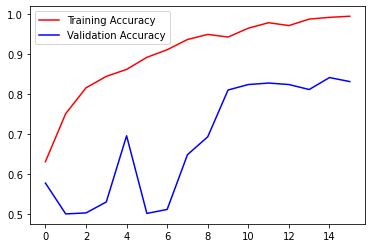

In [88]:
# Plot training & validation loss values
plt.plot(history_3.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history_3.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [90]:
model_3.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])

# Training the model
history_4 = model_3.fit(
                        data_X, data_y,
                        validation_data=(validate_X, validate_y), 
                         epochs=50,
                        callbacks=[early_stopping])                

Epoch 1/50


/opt/anaconda3/lib/python3.9/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


101/101 [==============================] - 19s 177ms/step - loss: 0.0559 - accuracy: 0.9801 - val_loss: 0.5674 - val_accuracy: 0.8410
Epoch 2/50
101/101 [==============================] - 18s 177ms/step - loss: 0.0539 - accuracy: 0.9810 - val_loss: 0.5704 - val_accuracy: 0.8385
Epoch 3/50
101/101 [==============================] - 18s 175ms/step - loss: 0.0564 - accuracy: 0.9795 - val_loss: 0.6097 - val_accuracy: 0.8261
Epoch 4/50
101/101 [==============================] - 18s 177ms/step - loss: 0.0458 - accuracy: 0.9826 - val_loss: 0.5920 - val_accuracy: 0.8410
Epoch 5/50
101/101 [==============================] - 18s 177ms/step - loss: 0.0429 - accuracy: 0.9851 - val_loss: 0.6057 - val_accuracy: 0.8323
Epoch 6/50
101/101 [==============================] - 18s 175ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.6719 - val_accuracy: 0.8149
Epoch 7/50
101/101 [==============================] - 18s 178ms/step - loss: 0.0340 - accuracy: 0.9866 - val_loss: 0.6340 - val_accuracy: 0.8

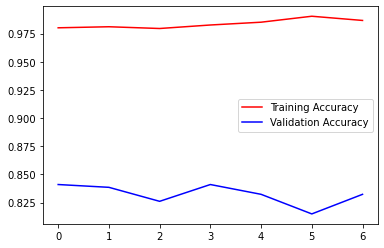

In [92]:
# Plot training & validation loss values
plt.plot(history_4.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history_4.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [93]:
test_X = np.array(test_dataFrame['np_normalize_img'].tolist())
test_y = np.array(test_dataFrame['class'].tolist())
model_2.evaluate(test_X,test_y)

14/14 [==============================] - 1s 36ms/step - loss: 0.4925 - accuracy: 0.8333


[0.4925215542316437, 0.8333333134651184]

For  model performance better than base mode with
loss is 0.4 and accuracy is 82.86% of the predictions m

In [94]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Happy', 'Not Happy'], yticklabels=['Happy', 'Not Happy'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [95]:
train_prediction_X = model_2.predict(validate_X)
train_predicted_labels = np.argmax(train_prediction_X, axis=1)

26/26 [==============================] - 1s 36ms/step


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       401
           1       0.84      0.87      0.86       404

    accuracy                           0.85       805
   macro avg       0.85      0.85      0.85       805
weighted avg       0.85      0.85      0.85       805



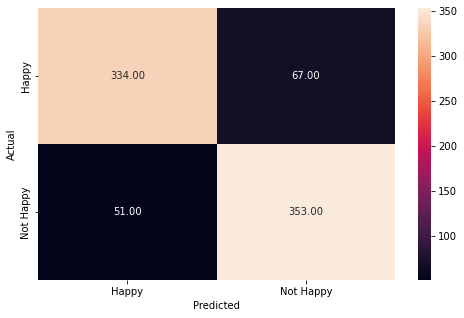

In [96]:
metrics_score(validate_y, train_predicted_labels)

In [3]:
!jupyter nbconvert --to html milestone-part3-final.ipynb

[NbConvertApp] Converting notebook milestone-part3-final.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 488146 bytes to milestone-part3-final.html
